<a href="https://colab.research.google.com/github/nasywafunnisa/pengolahan-citra-digital/blob/main/praktikum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

===== PROGRAM PRAKTIKUM CITRA DIGITAL =====
=== Upload Gambar Pribadi (JPG/PNG) ===


Saving gambar1.jpeg to gambar1.jpeg
Gambar berhasil diupload: gambar1.jpeg

=== LATIHAN 1: ANALISIS CITRA PRIBADI ===


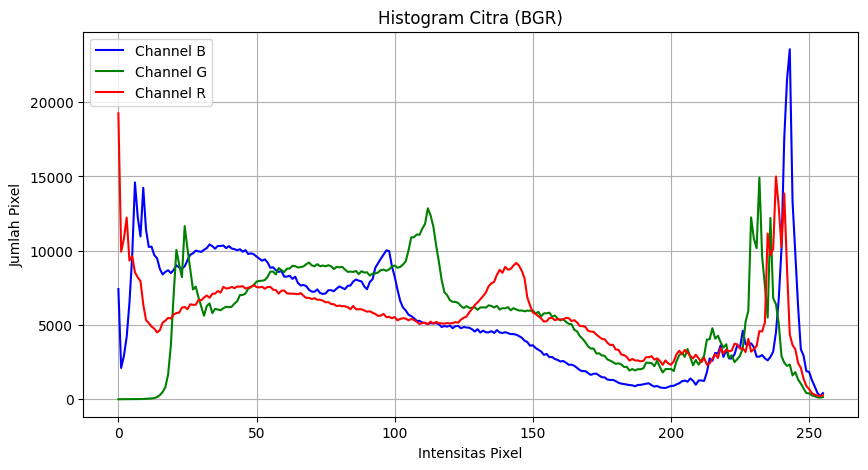

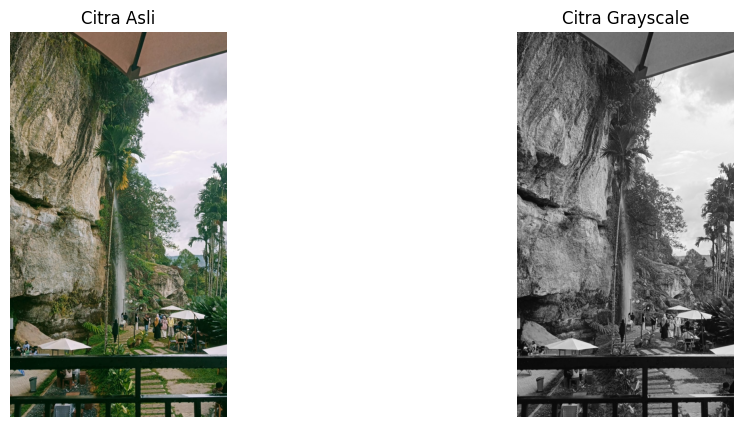


                 HASIL ANALISIS CITRA PRIBADI

1. DIMENSI DAN RESOLUSI CITRA
-----------------------------------------------------------------
Lebar Citra              : 899 pixel
Tinggi Citra             : 1600 pixel
Jumlah Channel (RGB)     : 3
Resolusi (Total Pixel)   : 1,438,400 pixel

2. ASPECT RATIO
-----------------------------------------------------------------
Aspect Ratio (W/H)       : 0.5619

3. PERBANDINGAN UKURAN CITRA
-----------------------------------------------------------------
Ukuran Citra Asli        : (1600, 899, 3)
Ukuran Citra Grayscale   : (1600, 899)

4. STATISTIK NILAI PIXEL
-----------------------------------------------------------------
Mean (Rata-rata Pixel)   : 107.51
Standar Deviasi          : 69.86
Nilai Minimum Pixel      : 0
Nilai Maksimum Pixel     : 255

5. PERBANDINGAN DENGAN CITRA SAMPLE
-----------------------------------------------------------------
Mean Difference          : 72.67
Keterangan:
- Mean menunjukkan rata-rata intensitas piksel
-

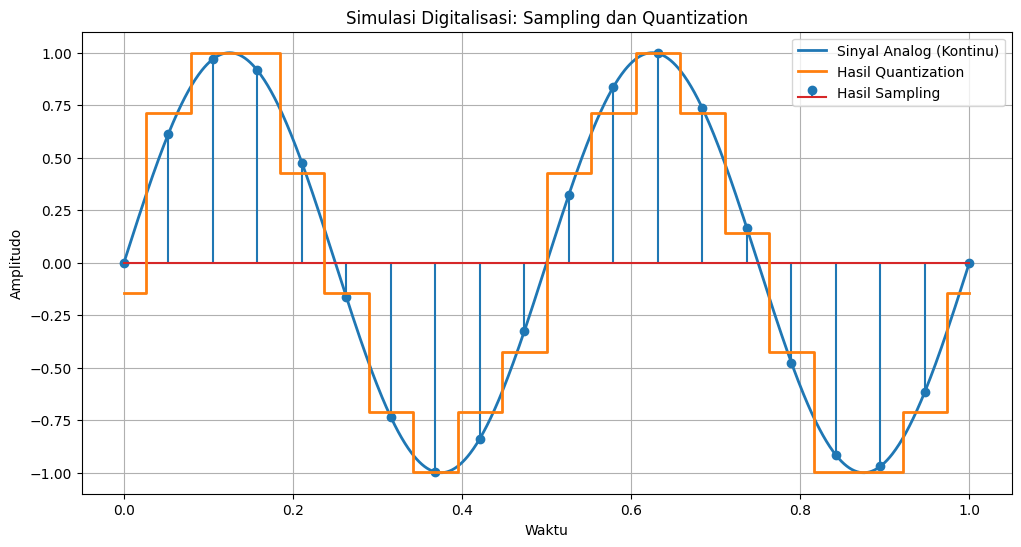


=== DATA HASIL DIGITALISASI ===
Sampling Signal:
[ 0.00000000e+00  6.14212713e-01  9.69400266e-01  9.15773327e-01
  4.75947393e-01 -1.64594590e-01 -7.35723911e-01 -9.96584493e-01
 -8.37166478e-01 -3.24699469e-01  3.24699469e-01  8.37166478e-01
  9.96584493e-01  7.35723911e-01  1.64594590e-01 -4.75947393e-01
 -9.15773327e-01 -9.69400266e-01 -6.14212713e-01 -4.89858720e-16]

Quantized Signal:
[-0.14236921  0.71184607  0.99658449  0.99658449  0.42710764 -0.14236921
 -0.71184607 -0.99658449 -0.71184607 -0.42710764  0.42710764  0.71184607
  0.99658449  0.71184607  0.14236921 -0.42710764 -0.99658449 -0.99658449
 -0.71184607 -0.14236921]

===== PROGRAM SELESAI =====


In [1]:
# ============================================================
# PRAKTIKUM CITRA DIGITAL (FINAL - TANPA TABEL, SUPER RAPI)
# Latihan 1 : Analisis Citra Pribadi
# Latihan 2 : Simulasi Digitalisasi
# ============================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

def print_analysis_results(results):
    """Menampilkan hasil analisis dalam format rapi (tanpa tabel)"""

    width, height, channel = results["Dimensi (Width, Height, Channel)"]

    print("\n" + "="*65)
    print("                 HASIL ANALISIS CITRA PRIBADI")
    print("="*65)

    # 1. Dimensi & Resolusi
    print("\n1. DIMENSI DAN RESOLUSI CITRA")
    print("-"*65)
    print(f"Lebar Citra              : {width} pixel")
    print(f"Tinggi Citra             : {height} pixel")
    print(f"Jumlah Channel (RGB)     : {channel}")
    print(f"Resolusi (Total Pixel)   : {results['Resolusi (Jumlah Pixel)']:,} pixel")

    # 2. Aspect Ratio
    print("\n2. ASPECT RATIO")
    print("-"*65)
    print(f"Aspect Ratio (W/H)       : {results['Aspect Ratio']:.4f}")

    # 3. Ukuran Citra
    print("\n3. PERBANDINGAN UKURAN CITRA")
    print("-"*65)
    print(f"Ukuran Citra Asli        : {results['Ukuran Citra Asli']}")
    print(f"Ukuran Citra Grayscale   : {results['Ukuran Grayscale']}")

    # 4. Statistik Pixel
    print("\n4. STATISTIK NILAI PIXEL")
    print("-"*65)
    print(f"Mean (Rata-rata Pixel)   : {results['Mean Pixel']:.2f}")
    print(f"Standar Deviasi          : {results['Standar Deviasi']:.2f}")
    print(f"Nilai Minimum Pixel      : {results['Nilai Minimum Pixel']}")
    print(f"Nilai Maksimum Pixel     : {results['Nilai Maksimum Pixel']}")

    # 5. Perbandingan dengan Sample
    print("\n5. PERBANDINGAN DENGAN CITRA SAMPLE")
    print("-"*65)
    print(f"Mean Difference          : {results['Perbedaan dengan Citra Sample (Mean Difference)']:.2f}")

    print("="*65)
    print("Keterangan:")
    print("- Mean menunjukkan rata-rata intensitas piksel")
    print("- Standar deviasi menunjukkan variasi intensitas citra")
    print("- Semakin besar resolusi, semakin detail citra")
    print("="*65)


# ============================================================
# LATIHAN 1 : ANALISIS CITRA PRIBADI
# ============================================================
def upload_image():
    print("=== Upload Gambar Pribadi (JPG/PNG) ===")
    uploaded = files.upload()
    image_name = list(uploaded.keys())[0]
    print(f"Gambar berhasil diupload: {image_name}")
    return image_name


def analyze_my_image(image_path):
    print("\n=== LATIHAN 1: ANALISIS CITRA PRIBADI ===")

    img = cv2.imread(image_path)

    if img is None:
        print("ERROR: File gambar tidak ditemukan!")
        print("Daftar file:", os.listdir())
        return None

    results = {}

    # 1. Dimensi dan resolusi
    height, width, channels = img.shape
    resolution = width * height
    results["Dimensi (Width, Height, Channel)"] = (width, height, channels)
    results["Resolusi (Jumlah Pixel)"] = resolution

    # 2. Aspect Ratio
    results["Aspect Ratio"] = width / height

    # 3. Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    results["Ukuran Citra Asli"] = img.shape
    results["Ukuran Grayscale"] = gray.shape

    # 4. Statistik
    results["Mean Pixel"] = float(np.mean(img))
    results["Standar Deviasi"] = float(np.std(img))
    results["Nilai Minimum Pixel"] = int(np.min(img))
    results["Nilai Maksimum Pixel"] = int(np.max(img))

    # 5. Histogram Channel
    plt.figure(figsize=(10,5))
    colors = ('b','g','r')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0,256])
        plt.plot(hist, color=color, label=f'Channel {color.upper()}')
    plt.title("Histogram Citra (BGR)")
    plt.xlabel("Intensitas Pixel")
    plt.ylabel("Jumlah Pixel")
    plt.legend()
    plt.grid(True)
    plt.show()

    # 6. Perbandingan dengan citra sample (flip horizontal)
    sample = cv2.flip(img, 1)
    diff = cv2.absdiff(img, sample)
    results["Perbedaan dengan Citra Sample (Mean Difference)"] = float(np.mean(diff))

    # Tampilkan citra
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.title("Citra Asli")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("Citra Grayscale")
    plt.imshow(gray, cmap='gray')
    plt.axis("off")

    plt.show()

    return results


# ============================================================
# LATIHAN 2 : SIMULASI DIGITALISASI
# ============================================================
def simulate_digitization(analog_signal, sampling_rate, quantization_levels):
    print("\n=== LATIHAN 2: SIMULASI DIGITALISASI ===")

    t_cont = np.linspace(0, 1, 1000)
    signal_cont = analog_signal(t_cont)

    # Sampling
    t_sample = np.linspace(0, 1, sampling_rate)
    signal_sample = analog_signal(t_sample)

    # Quantization
    min_val = np.min(signal_sample)
    max_val = np.max(signal_sample)
    q_levels = np.linspace(min_val, max_val, quantization_levels)

    quantized_signal = np.zeros_like(signal_sample)
    for i, val in enumerate(signal_sample):
        idx = np.argmin(np.abs(q_levels - val))
        quantized_signal[i] = q_levels[idx]

    # Visualisasi
    plt.figure(figsize=(12,6))
    plt.plot(t_cont, signal_cont, label="Sinyal Analog (Kontinu)", linewidth=2)
    plt.stem(t_sample, signal_sample, label="Hasil Sampling")
    plt.step(t_sample, quantized_signal, where='mid', label="Hasil Quantization", linewidth=2)

    plt.title("Simulasi Digitalisasi: Sampling dan Quantization")
    plt.xlabel("Waktu")
    plt.ylabel("Amplitudo")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        "Sampling Signal": signal_sample,
        "Quantized Signal": quantized_signal
    }


# ============================================================
# MAIN PROGRAM
# ============================================================
def main():
    print("===== PROGRAM PRAKTIKUM CITRA DIGITAL =====")

    # Latihan 1
    image_name = upload_image()
    results = analyze_my_image(image_name)

    if results:
        print_analysis_results(results)

    # Latihan 2
    analog_function = lambda x: np.sin(2 * np.pi * 2 * x)

    sampling_rate = 20
    quantization_levels = 8

    digitization_results = simulate_digitization(
        analog_signal=analog_function,
        sampling_rate=sampling_rate,
        quantization_levels=quantization_levels
    )

    print("\n=== DATA HASIL DIGITALISASI ===")
    print("Sampling Signal:")
    print(digitization_results["Sampling Signal"])
    print("\nQuantized Signal:")
    print(digitization_results["Quantized Signal"])

    print("\n===== PROGRAM SELESAI =====")

main()